In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

geo = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/EDA/police_geo_phx.geojson"
geo_gdf = gpd.read_file(geo)

In [ ]:
# poverty level data sourced from 2022 American Communities Survey

poverty_csv = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/Ben/census_poverty_level.csv"
poverty_df = pd.read_csv(poverty_csv, header=0, skiprows=[0])

poverty_df.rename(columns={poverty_df.columns[2]: 'Number of Households'}, inplace=True)
poverty_df.rename(columns={poverty_df.columns[4]: 'Number Households Below Poverty Level'}, inplace=True)

poverty_df = poverty_df.iloc[:, [0,1,2,4]]

poverty_df.head(5)

,Geography,Geographic Area Name,Number of Households,Number Households Below Poverty Level
0,1500000US040130101021,Block Group 1; Census Tract 101.02; Maricopa C...,369,66
1,1500000US040130101022,Block Group 2; Census Tract 101.02; Maricopa C...,864,54
2,1500000US040130101023,Block Group 3; Census Tract 101.02; Maricopa C...,1415,90
3,1500000US040130101031,Block Group 1; Census Tract 101.03; Maricopa C...,630,90
4,1500000US040130101032,Block Group 2; Census Tract 101.03; Maricopa C...,846,69


In [ ]:
poverty_df['Rate Below Poverty Level'] = poverty_df['Number Households Below Poverty Level'] / poverty_df['Number of Households']

In [ ]:
income_location = geo_gdf.merge(poverty_df, left_on='GEOIDFQ', right_on='Geography', how='left')

([], [])

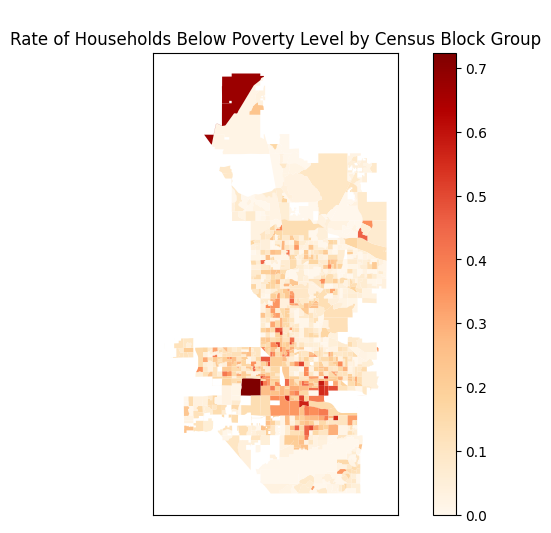

In [ ]:
income_location.plot(column='Rate Below Poverty Level', cmap='OrRd', figsize=(9, 6), legend=True)
plt.title("\nRate of Households Below Poverty Level by Census Block Group", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
poverty_beat = income_location.groupby('BEAT')[['Number of Households', 'Number Households Below Poverty Level']].sum()
poverty_beat['Poverty Rate'] = poverty_beat['Number Households Below Poverty Level'] / poverty_beat['Number of Households']

In [ ]:
poverty_precinct = income_location.groupby('PRECINCT')[['Number of Households', 'Number Households Below Poverty Level']].sum()
poverty_precinct['Poverty Rate'] = poverty_precinct['Number Households Below Poverty Level'] / poverty_precinct['Number of Households']

In [ ]:
precincts = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/Ben/Police_Precincts.zip"
precincts_gdf = gpd.read_file(precincts)

beats = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/Ben/Police_Beats.zip"
beats_gdf = gpd.read_file(beats)

In [ ]:
precincts_gdf = precincts_gdf.iloc[:,[0,1,5]]

In [ ]:
precinct_map = precincts_gdf.merge(poverty_precinct, left_on='NAME', right_on='PRECINCT', how='left')
beat_map =  beats_gdf.merge(poverty_beat, left_on='BEAT', right_on='BEAT', how='left')

([], [])

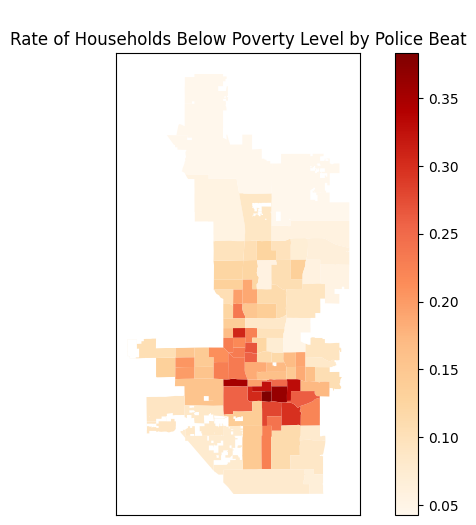

In [ ]:
beat_map.plot(column='Poverty Rate', cmap='OrRd', figsize=(9, 6), legend=True)
plt.title("\nRate of Households Below Poverty Level by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

([], [])

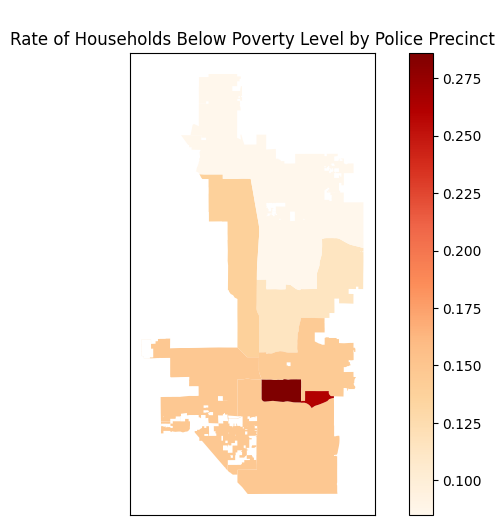

In [ ]:
precinct_map.plot(column='Poverty Rate', cmap='OrRd', figsize=(9, 6), legend=True)
plt.title("\nRate of Households Below Poverty Level by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
pop = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/Ben/census_pop.csv"
pop_df = pd.read_csv(pop, header=0, skiprows=[0])
pop_df.rename(columns={pop_df.columns[2]: 'Total Pop'}, inplace=True)
pop_df = pop_df.iloc[:, [0,1,2]]

In [ ]:
black_pop = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/Ben/census_black_pop.csv"
black_pop_df = pd.read_csv(black_pop, header=0, skiprows=[0])
black_pop_df.rename(columns={black_pop_df.columns[2]: 'Black Pop'}, inplace=True)
black_pop_df = black_pop_df.iloc[:, [0,1,2]]

In [ ]:
cb_location = income_location.merge(pop_df, on='Geography', how='inner')
cb_location = cb_location.drop(cb_location.columns[[7,8,11,12,19,24]], axis=1)
cb_location.rename(columns={cb_location.columns[15]: 'Geographic Area Name'}, inplace=True)

#remove 24,19,7,8,11,12

In [ ]:
cb_location = cb_location.merge(black_pop_df, left_on='GEOIDFQ', right_on='Geography', how='inner')
cb_location = cb_location.drop(cb_location.columns[[20,21]], axis=1)

In [ ]:
cb_location['Black Pop Rate'] = cb_location['Black Pop'] / cb_location['Total Pop']

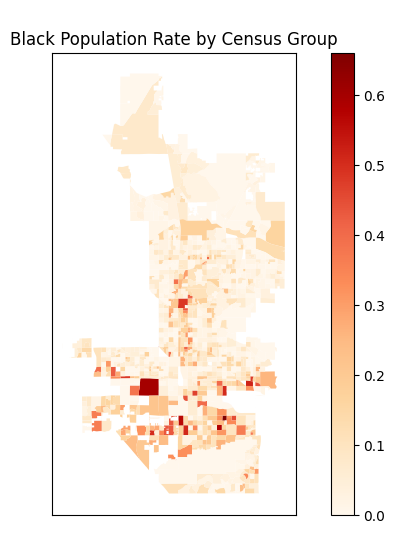

In [ ]:
cb_location.plot(column='Black Pop Rate', cmap='OrRd', figsize=(9, 6), legend=True)
plt.title("\nBlack Population Rate by Census Group", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('black_pop.png')

In [ ]:
black_beat = cb_location.groupby('BEAT')[['Total Pop', 'Black Pop']].sum()
black_beat['Black Pop Rate'] = black_beat['Black Pop'] / black_beat['Total Pop']

In [ ]:
black_precinct = cb_location.groupby('PRECINCT')[['Total Pop', 'Black Pop']].sum()
black_precinct['Black Pop Rate'] = black_precinct['Black Pop'] / black_precinct['Total Pop']

In [ ]:
precinct_map = precinct_map.merge(black_precinct, left_on='NAME', right_on='PRECINCT', how='inner')
beat_map = beat_map.merge(black_beat, on='BEAT', how='inner')

([], [])

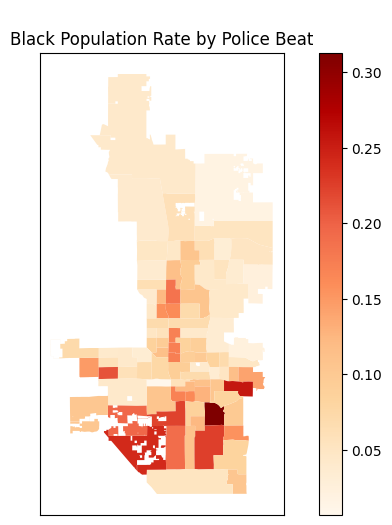

In [ ]:
beat_map.plot(column='Black Pop Rate', cmap='OrRd', figsize=(9, 6), legend=True)
plt.title("\nBlack Population Rate by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

([], [])

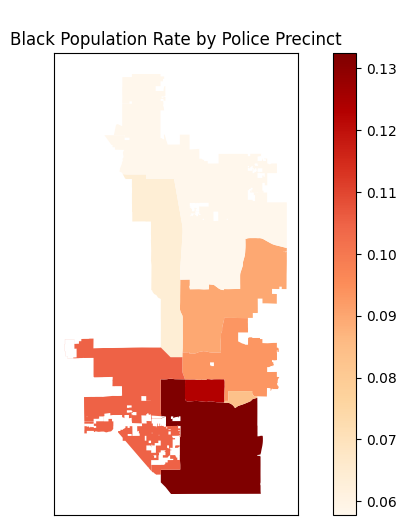

In [ ]:
precinct_map.plot(column='Black Pop Rate', cmap='OrRd', figsize=(9, 6), legend=True)
plt.title("\nBlack Population Rate by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
hispanic_pop = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/Ben/census_hispanic_pop.csv"
hispanic_pop_df = pd.read_csv(hispanic_pop, header=0, skiprows=[0])
hispanic_pop_df.rename(columns={hispanic_pop_df.columns[6]: 'Hispanic Pop'}, inplace=True)
hispanic_pop_df = hispanic_pop_df.iloc[:, [0,1,6]]

In [ ]:
cb_location = cb_location.merge(hispanic_pop_df, left_on='GEOIDFQ' ,right_on='Geography', how='inner')
cb_location['Hispanic Pop Rate'] = cb_location['Hispanic Pop'] / cb_location['Total Pop']
cb_location = cb_location.drop(cb_location.columns[[22,23]], axis=1)

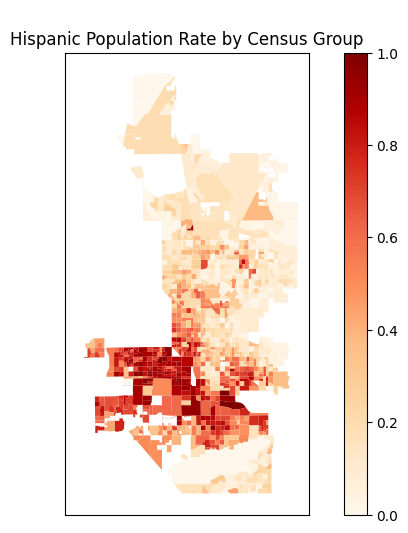

In [ ]:
cb_location.plot(column='Hispanic Pop Rate', cmap='OrRd', figsize=(9, 6), legend=True)
plt.title("\nHispanic Population Rate by Census Group", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('hispanic_pop.png')

In [ ]:
hispanic_beat = cb_location.groupby('BEAT')[['Total Pop', 'Hispanic Pop']].sum()
hispanic_beat['Hispanic Pop Rate'] = hispanic_beat['Hispanic Pop'] / hispanic_beat['Total Pop']

hispanic_precinct = cb_location.groupby('PRECINCT')[['Total Pop', 'Hispanic Pop']].sum()
hispanic_precinct['Hispanic Pop Rate'] = hispanic_precinct['Hispanic Pop'] / hispanic_precinct['Total Pop']

In [ ]:
precinct_map = precinct_map.merge(hispanic_precinct, left_on='NAME', right_on='PRECINCT', how='inner')
beat_map = beat_map.merge(hispanic_beat, on='BEAT', how='inner')

In [ ]:
precinct_map.rename(columns={precinct_map.columns[6]: 'Total Pop'}, inplace=True)
precinct_map = precinct_map.drop(precinct_map.columns[[9]], axis=1)

beat_map.rename(columns={beat_map.columns[6]: 'Total Pop'}, inplace=True)
beat_map = beat_map.drop(beat_map.columns[[9]], axis=1)

([], [])

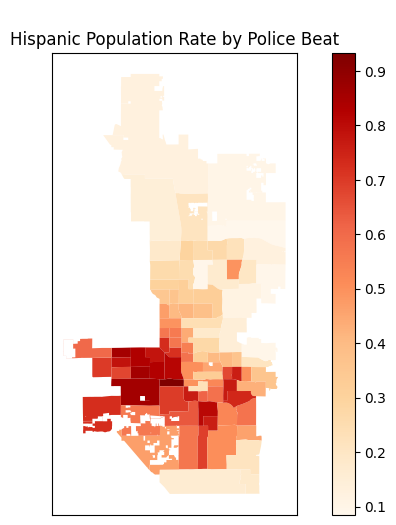

In [ ]:
beat_map.plot(column='Hispanic Pop Rate', cmap='OrRd', figsize=(9, 6), legend=True)
plt.title("\nHispanic Population Rate by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

([], [])

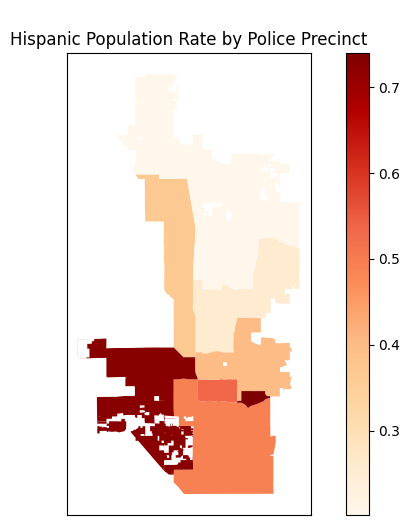

In [ ]:
precinct_map.plot(column='Hispanic Pop Rate', cmap='OrRd', figsize=(9, 6), legend=True)
plt.title("\nHispanic Population Rate by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

([], [])

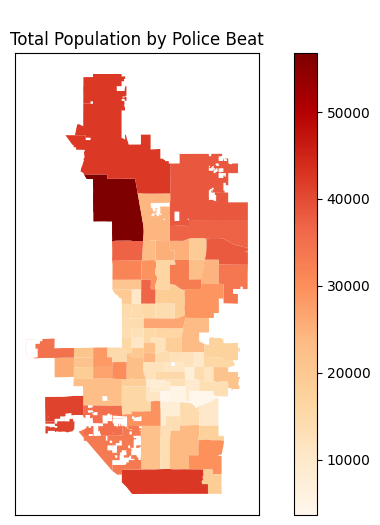

In [ ]:
# indicates likely correlation between crime/income) - given inverse of income graph

beat_map.plot(column='Total Pop', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nTotal Population by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

([], [])

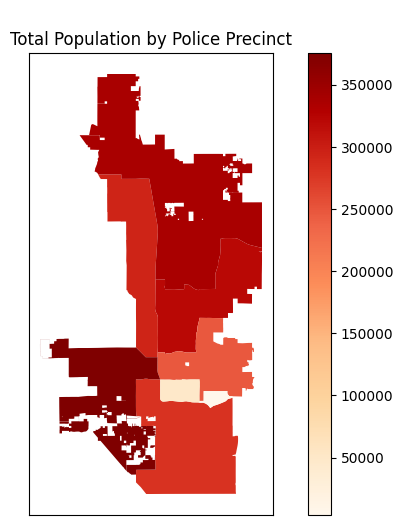

In [ ]:
# likely draws same conclusion as above

precinct_map.plot(column='Total Pop', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nTotal Population by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_beat_corr = cb_location.groupby(['PRECINCT','BEAT'])[['Number of Households', 'Number Households Below Poverty Level', 'Total Pop', 'Black Pop', 'Hispanic Pop']].sum().reset_index()
precinct_beat_corr['Poverty Rate'] = precinct_beat_corr['Number Households Below Poverty Level'] / precinct_beat_corr['Number of Households']
precinct_beat_corr['Black Pop Rate'] = precinct_beat_corr['Black Pop'] / precinct_beat_corr['Total Pop']
precinct_beat_corr['Hispanic Pop Rate'] = precinct_beat_corr['Hispanic Pop'] / precinct_beat_corr['Total Pop']

In [ ]:
uof = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/EDA/CPhoenix UOF Data/relabeled/cleaned_2-uof-incident-details.csv"
uof_df = pd.read_csv(uof, header=0)

uof_df = uof_df[~uof_df['Police Beat'].isin({'Maricopa', 'Out of City Beat'})]
uof_df['Police Beat'] = uof_df['Police Beat'].str[:3]
uof_df['Police Beat'] = uof_df['Police Beat'].astype(int)

In [ ]:
uof_beat = uof_df.groupby('Police Beat').size().reset_index(name='UOF Incidents')

In [ ]:
beat_map = beat_map.merge(uof_beat, left_on='BEAT', right_on='Police Beat', how='inner')
beat_map = beat_map.drop(beat_map.columns[[11]], axis=1)
beat_map['UOF per 100k'] = beat_map['UOF Incidents'] / beat_map['Total Pop'] * 100000

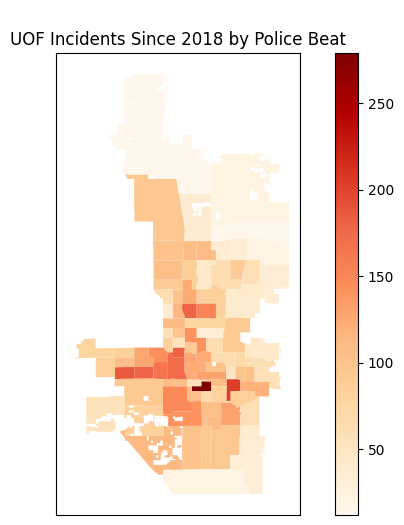

In [ ]:
beat_map.plot(column='UOF Incidents', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nUOF Incidents Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('UOF_beat_no.png')

([], [])

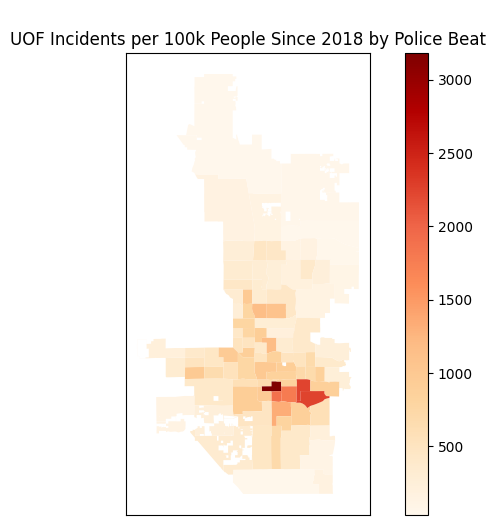

In [ ]:
beat_map.plot(column='UOF per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nUOF Incidents per 100k People Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_beat_corr = precinct_beat_corr.merge(uof_beat, left_on='BEAT', right_on='Police Beat', how='inner')
uof_precinct = precinct_beat_corr.groupby('PRECINCT')[['UOF Incidents']].sum()

In [ ]:
precinct_map = precinct_map.merge(uof_precinct, left_on='NAME', right_on='PRECINCT', how='inner')
precinct_map['UOF per 100k'] = precinct_map['UOF Incidents'] / precinct_map['Total Pop'] * 100000

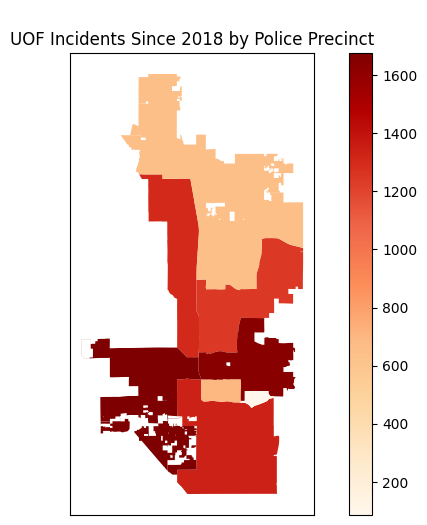

In [ ]:
precinct_map.plot(column='UOF Incidents', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nUOF Incidents Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('UOF_no_precinct.png')

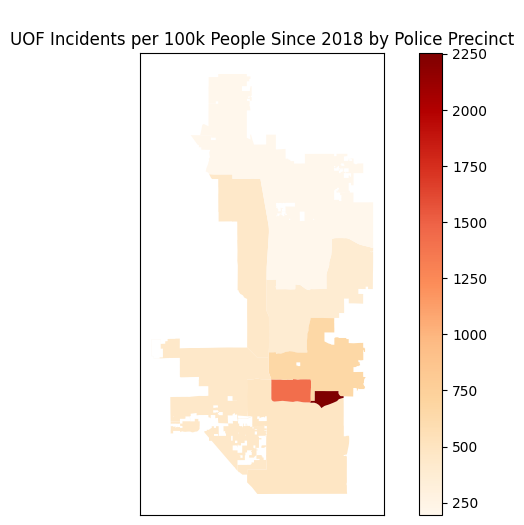

In [ ]:
precinct_map.plot(column='UOF per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nUOF Incidents per 100k People Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('UOF_precinct.png')

In [ ]:
lethal_beat = uof_df.groupby('Police Beat')[['Use of Force Utilized - Deadly Physical Force']].sum()

In [ ]:
beat_map = beat_map.merge(lethal_beat, left_on='BEAT', right_on='Police Beat', how='inner')
beat_map['Lethal per 100k'] = beat_map['Use of Force Utilized - Deadly Physical Force'] / beat_map['Total Pop'] * 100000

([], [])

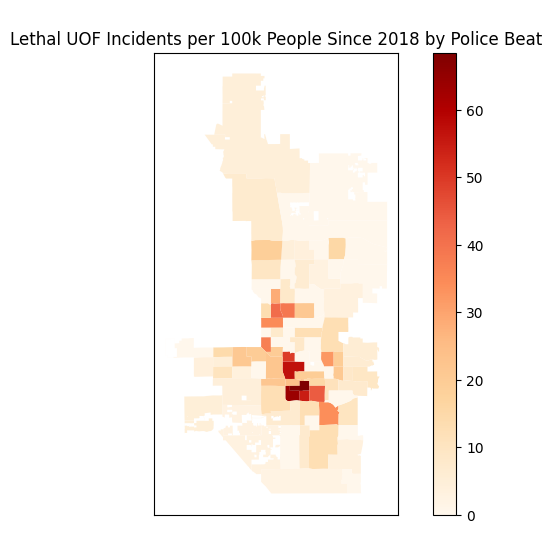

In [ ]:
beat_map.plot(column='Lethal per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nLethal UOF Incidents per 100k People Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_beat_corr = precinct_beat_corr.merge(lethal_beat, left_on='BEAT', right_on='Police Beat', how='inner')
lethal_precinct = precinct_beat_corr.groupby('PRECINCT')[['Use of Force Utilized - Deadly Physical Force']].sum()

In [ ]:
precinct_map = precinct_map.merge(lethal_precinct, left_on='NAME', right_on='PRECINCT', how='inner')
precinct_map['Lethal per 100k'] = precinct_map['Use of Force Utilized - Deadly Physical Force'] / precinct_map['Total Pop'] * 100000

([], [])

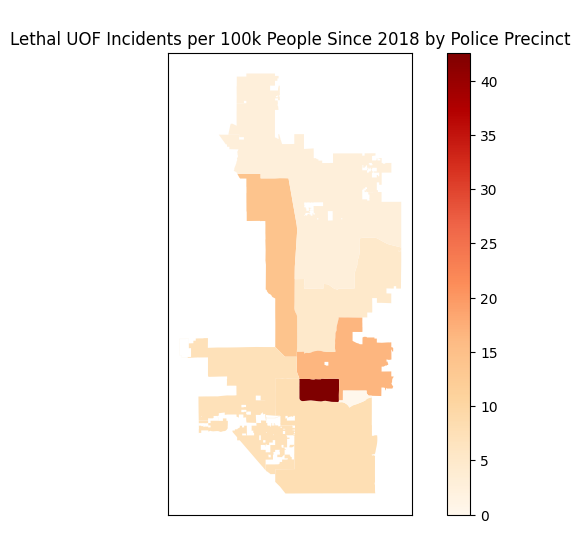

In [ ]:
precinct_map.plot(column='Lethal per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nLethal UOF Incidents per 100k People Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
crime = "/content/drive/Shareddrives/DAT 490 Capstone/DAT 490 Capstone/Ben/adult_arrests.csv"
crime_df = pd.read_csv(crime, header=0)
crime_df = crime_df.dropna(subset=['BEAT_NUM'])
crime_df = crime_df.dropna(subset=['PRECINCT'])

In [ ]:
arrests_beat = crime_df.groupby('BEAT_NUM').size().reset_index(name='Adult Arrests')

In [ ]:
beat_map = beat_map.merge(arrests_beat, left_on='BEAT', right_on='BEAT_NUM', how='inner')
beat_map = beat_map.drop(beat_map.columns[[15]], axis=1)
beat_map['Arrests per 100k'] = beat_map['Adult Arrests'] / beat_map['Total Pop'] * 100000

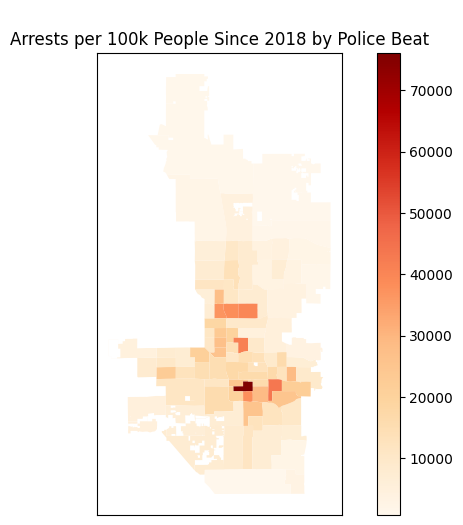

In [ ]:
beat_map.plot(column='Arrests per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nArrests per 100k People Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('arrests_beat.png')

([], [])

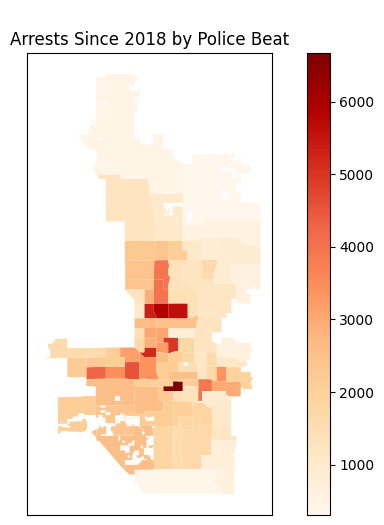

In [ ]:
beat_map.plot(column='Adult Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nArrests Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_beat_corr = precinct_beat_corr.merge(arrests_beat, left_on='BEAT', right_on='BEAT_NUM', how='inner')
arrests_precinct = precinct_beat_corr.groupby('PRECINCT')[['Adult Arrests']].sum()

In [ ]:
precinct_map = precinct_map.merge(arrests_precinct, left_on='NAME', right_on='PRECINCT', how='inner')
precinct_map['Arrests per 100k'] = precinct_map['Adult Arrests'] / precinct_map['Total Pop'] * 100000

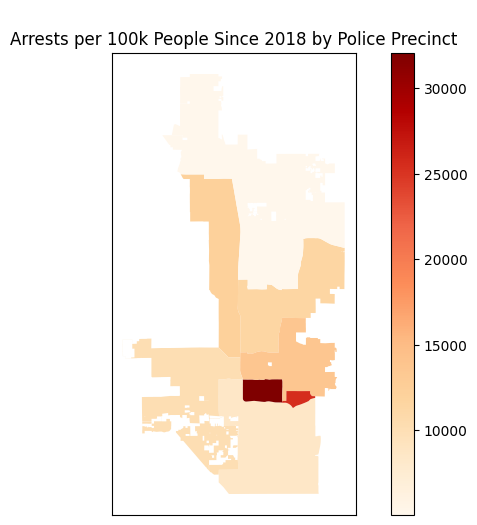

In [ ]:
precinct_map.plot(column='Arrests per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nArrests per 100k People Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('arrests_precinct.png')

([], [])

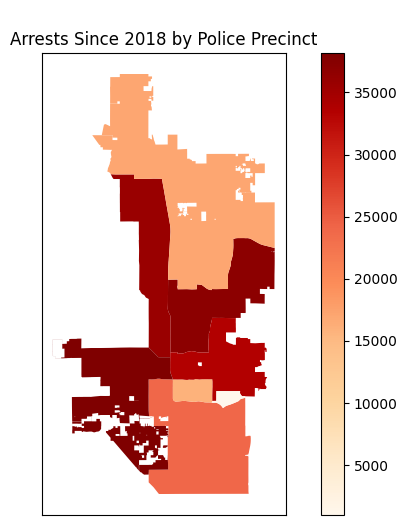

In [ ]:
precinct_map.plot(column='Adult Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nArrests Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_corr = precinct_map[precinct_map['NAME'] != 'Sky Harbor International Airport']

In [ ]:
precinct_corr.head(5)

,OBJECTID,NAME,geometry,Number of Households,Number Households Below Poverty Level,Poverty Rate,Total Pop,Black Pop,Black Pop Rate,Hispanic Pop,Hispanic Pop Rate,UOF Incidents,UOF per 100k,Use of Force Utilized - Deadly Physical Force,Lethal per 100k,Adult Arrests,Arrests per 100k
0,2889,South Mountain Precinct,"POLYGON ((-112.11724 33.46190, -112.10949 33.4...",94544,13911,0.147138,280937,37225,0.132503,137608,0.489818,1339,476.619313,22,7.830937,24075,8569.536942
1,2890,Central City Precinct,"POLYGON ((-112.06303 33.46193, -112.06093 33.4...",20012,5725,0.286078,49314,6070,0.123089,26293,0.533175,700,1419.475200,21,42.584256,15815,32070.000406
2,2891,Desert Horizon Precinct,"POLYGON ((-111.99052 33.67304, -111.99026 33.6...",140957,16111,0.114297,321710,28832,0.089621,82306,0.255839,1242,386.061981,16,4.973423,36882,11464.362314
3,2892,Mountain View Precinct,"POLYGON ((-112.02978 33.55370, -112.02534 33.5...",106336,15334,0.144203,246808,22985,0.093129,99552,0.403358,1636,662.863440,41,16.612103,33653,13635.295452
4,2893,Cactus Park Precinct,"POLYGON ((-112.15951 33.76159, -112.15255 33.7...",102350,14087,0.137636,293315,18702,0.063761,107558,0.366698,1304,444.573240,41,13.978146,35821,12212.467825


In [ ]:
precinct_corr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 7 entries, 0 to 7
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   OBJECTID                                       7 non-null      int64   
 1   NAME                                           7 non-null      object  
 2   geometry                                       7 non-null      geometry
 3   Number of Households                           7 non-null      int64   
 4   Number Households Below Poverty Level          7 non-null      int64   
 5   Poverty Rate                                   7 non-null      float64 
 6   Total Pop                                      7 non-null      int64   
 7   Black Pop                                      7 non-null      int64   
 8   Black Pop Rate                                 7 non-null      float64 
 9   Hispanic Pop                                

In [ ]:
# correlation between number of households in a precinct and poverty rate -
# this is VERY high and likely exceeds the correlation between number of households and crime (though we should check)
# does this mean that more impoverished areas may be relatively overpoliced?

# below should be uncommented when running through from top
#precinct_corr = precinct_map[precinct_map['NAME'] != 'Sky Harbor International Airport']



##### DO THIS THING AGAIN WITH A RATIO FOR VIOLENT ARRESTS

print(precinct_corr['Poverty Rate'].corr(precinct_corr['Total Pop']))
print(precinct_corr['Black Pop Rate'].corr(precinct_corr['Total Pop']))
print(precinct_corr['Hispanic Pop Rate'].corr(precinct_corr['Total Pop']))
print(precinct_corr['Arrests per 100k'].corr(precinct_corr['Total Pop']))
#print(precinct_corr['Violent Arrests per 100k'].corr(precinct_corr['Total Pop']))
print('\n')
print('\n')

print(precinct_corr['Black Pop'].corr(precinct_corr['Total Pop']))
print(precinct_corr['Hispanic Pop'].corr(precinct_corr['Total Pop']))
print(precinct_corr['Adult Arrests'].corr(precinct_corr['Total Pop']))
#print(precinct_corr['Violent Crime Arrests'].corr(precinct_corr['Total Pop']))
print(precinct_corr['Felony Crime Arrests'].corr(precinct_corr['Total Pop']))

print('\n')
print('\n')

print(precinct_corr['Poverty Rate'].corr(precinct_corr['UOF per 100k']))
print(precinct_corr['Black Pop Rate'].corr(precinct_corr['UOF per 100k']))
print(precinct_corr['Hispanic Pop Rate'].corr(precinct_corr['UOF per 100k']))
print(precinct_corr['Arrests per 100k'].corr(precinct_corr['UOF per 100k']))
print(precinct_corr['Violent Arrests per 100k'].corr(precinct_corr['UOF per 100k']))
print('\n')
print(precinct_corr['Poverty Rate'].corr(precinct_corr['Arrests per 100k']))
print(precinct_corr['Black Pop Rate'].corr(precinct_corr['Arrests per 100k']))
print(precinct_corr['Hispanic Pop Rate'].corr(precinct_corr['Arrests per 100k']))

print('\n')
print('\n')

print(precinct_corr['Poverty Rate'].corr(precinct_corr['UOF to Arrests']))
print(precinct_corr['Black Pop Rate'].corr(precinct_corr['UOF to Arrests']))
print(precinct_corr['Hispanic Pop Rate'].corr(precinct_corr['UOF to Arrests']))
print(precinct_corr['Violent Arrests per 100k'].corr(precinct_corr['UOF to Arrests']))

print('\n')
print('\n')

print(precinct_corr['Poverty Rate'].corr(precinct_corr['Severe UOF to Arrests']))
print(precinct_corr['Black Pop Rate'].corr(precinct_corr['Severe UOF to Arrests']))
print(precinct_corr['Hispanic Pop Rate'].corr(precinct_corr['Severe UOF to Arrests']))
print(precinct_corr['Violent Arrests per 100k'].corr(precinct_corr['Severe UOF to Arrests']))


print('\n')
print('\n')

print(precinct_corr['Poverty Rate'].corr(precinct_corr['Very Severe UOF to Arrests']))
print(precinct_corr['Black Pop Rate'].corr(precinct_corr['Very Severe UOF to Arrests']))
print(precinct_corr['Hispanic Pop Rate'].corr(precinct_corr['Very Severe UOF to Arrests']))
print(precinct_corr['Violent Arrests per 100k'].corr(precinct_corr['Very Severe UOF to Arrests']))

-0.9041792531938595
-0.4571444999368732
-0.13958745235204542
-0.9320655028264713




0.7521575743192134
0.6363865284229994
0.5673904312214155


KeyError: 'Felony Crime Arrests'

In [ ]:
precinct_beat_corr.info()

In [ ]:
precinct_beat_corr['Arrests per 100k'] = precinct_beat_corr['Adult Arrests'] / precinct_beat_corr['Total Pop'] * 100000
precinct_beat_corr['Violent Arrests per 100k'] = precinct_beat_corr['Violent Crime Arrests'] / precinct_beat_corr['Total Pop'] * 100000

precinct_beat_corr['UOF per 100k'] = precinct_beat_corr['UOF Incidents'] / precinct_beat_corr['Total Pop'] * 100000
precinct_beat_corr['Very Severe UOF per 100k'] = precinct_beat_corr['Very Severe UOF Incidents'] / precinct_beat_corr['Total Pop'] * 100000

precinct_beat_corr['UOF to Arrests'] = precinct_beat_corr['UOF per 100k'] / precinct_beat_corr['Arrests per 100k']
precinct_beat_corr['Very Severe UOF to Arrests'] = precinct_beat_corr['Very Severe UOF per 100k'] / precinct_beat_corr['Adult Arrests']

KeyError: 'Violent Crime Arrests'

In [ ]:
#precinct_beat_corr['UOF per 100k'] = precinct_beat_corr['UOF Incidents'] / precinct_beat_corr['Total Pop'] * 100000

#beat_corr = precinct_beat_corr[precinct_beat_corr['PRECINCT'] != 'Sky Harbor International Airport']

beat_corr['Arrests per 100k'] = beat_corr['Adult Arrests'] / beat_corr['Total Pop'] * 100000
print(beat_corr['Poverty Rate'].corr(beat_corr['Total Pop']))
print(beat_corr['Black Pop Rate'].corr(beat_corr['Total Pop']))
print(beat_corr['Hispanic Pop Rate'].corr(beat_corr['Total Pop']))
print(beat_corr['Arrests per 100k'].corr(beat_corr['Total Pop']))
#print(beat_corr['Violent Arrests per 100k'].corr(beat_corr['Total Pop']))

print("\n")
print(beat_corr['Poverty Rate'].corr(beat_corr['Arrests per 100k']))
print("\n")

print(beat_corr['Poverty Rate'].corr(beat_corr['UOF per 100k']))
print(beat_corr['Black Pop Rate'].corr(beat_corr['UOF per 100k']))
print(beat_corr['Hispanic Pop Rate'].corr(beat_corr['UOF per 100k']))
print(beat_corr['Arrests per 100k'].corr(beat_corr['UOF per 100k']))
print(beat_corr['Violent Arrests per 100k'].corr(beat_corr['UOF per 100k']))

print("\n")
print("\n")

print(precinct_beat_corr['Poverty Rate'].corr(precinct_beat_corr['UOF to Arrests']))
print(precinct_beat_corr['Black Pop Rate'].corr(precinct_beat_corr['UOF to Arrests']))
print(precinct_beat_corr['Hispanic Pop Rate'].corr(precinct_beat_corr['UOF to Arrests']))
print(precinct_beat_corr['Violent Arrests per 100k'].corr(precinct_beat_corr['UOF to Arrests']))

print("\n")
print("\n")

print(precinct_beat_corr['Poverty Rate'].corr(precinct_beat_corr['Very Severe UOF to Arrests']))
print(precinct_beat_corr['Black Pop Rate'].corr(precinct_beat_corr['Very Severe UOF to Arrests']))
print(precinct_beat_corr['Hispanic Pop Rate'].corr(precinct_beat_corr['Very Severe UOF to Arrests']))
print(precinct_beat_corr['Violent Arrests per 100k'].corr(precinct_beat_corr['Very Severe UOF to Arrests']))

In [ ]:
######### my gameplan

# at end add to correlations - bring to end - make look nice
  #when writing propose next steps - looking into multiple levels of force, differentiating maps by types of crime
# note potential conclusions like poverty,black pop,hispanic pop all correlating more with UOF than with arrests

# then done :)



In [ ]:
### this is for methodology / results

# 1) divide force dataset into severe vs non severe force
    #also apply force continuum if that is not already there

# 2) divide crime dataset into types of crime: 'violent', 'homicide', 'property', etc.

In [ ]:
uof_df.info()

In [ ]:
print(uof_df.iloc[:, 30].sum(), "Deadly")
print(uof_df.iloc[:, 31].sum(), "Canines")
print(uof_df.iloc[:, 32].sum(), "Impact Weapons")
print(uof_df.iloc[:, 33].sum(), "Hard Hand")
print(uof_df.iloc[:, 34].sum(), "Direct Impact Munitions")
print(uof_df.iloc[:, 35].sum(), "Taser")
print(uof_df.iloc[:, 36].sum(), "Irritants")
print(uof_df.iloc[:, 37].sum(), "Tripping")
print(uof_df.iloc[:, 38].sum(), "Soft Hand")
print(uof_df.iloc[:, 39].sum(), "Other")

176 Deadly
256 Canines
31 Impact Weapons
1820 Hard Hand
878 Direct Impact Munitions
1126 Taser
123 Irritants
977 Tripping
4467 Soft Hand
370 Other


In [ ]:
severe_force_binaries = uof_df.iloc[:, 30:38].sum(axis=1)
uof_df['Severe Force Used'] = (severe_force_binaries >= 1).astype(int)

In [ ]:
very_severe_force_binaries = uof_df.iloc[:, 30:34].sum(axis=1)
uof_df['Very Severe Force Used'] = (very_severe_force_binaries >= 1).astype(int)

In [ ]:
severe_uof_beat = uof_df.groupby('Police Beat')['Severe Force Used'].sum().reset_index(name='Severe UOF Incidents')

In [ ]:
very_severe_uof_beat = uof_df.groupby('Police Beat')['Very Severe Force Used'].sum().reset_index(name='Very Severe UOF Incidents')

In [ ]:
beat_map = beat_map.merge(severe_uof_beat, left_on='BEAT', right_on='Police Beat', how='inner')
beat_map = beat_map.drop(beat_map.columns[[17]], axis=1)
beat_map['Severe UOF per 100k'] = beat_map['Severe UOF Incidents'] / beat_map['Total Pop'] * 100000
beat_map['Severe UOF Ratio'] = beat_map['Severe UOF Incidents'] / beat_map['UOF Incidents']

In [ ]:
beat_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   OBJECTID                                       92 non-null     int64   
 1   BEAT                                           92 non-null     int64   
 2   geometry                                       92 non-null     geometry
 3   Number of Households                           92 non-null     int64   
 4   Number Households Below Poverty Level          92 non-null     int64   
 5   Poverty Rate                                   92 non-null     float64 
 6   Total Pop                                      92 non-null     int64   
 7   Black Pop                                      92 non-null     int64   
 8   Black Pop Rate                                 92 non-null     float64 
 9   Hispanic Pop                         

In [ ]:
beat_map = beat_map.merge(very_severe_uof_beat, left_on='BEAT', right_on='Police Beat', how='inner')
beat_map = beat_map.drop(beat_map.columns[[20]], axis=1)
beat_map['Very Severe UOF per 100k'] = beat_map['Very Severe UOF Incidents'] / beat_map['Total Pop'] * 100000
beat_map['Very Severe UOF Ratio'] = beat_map['Very Severe UOF Incidents'] / beat_map['UOF Incidents']

KeyError: 'Very Severe UOF Incidents'

([], [])

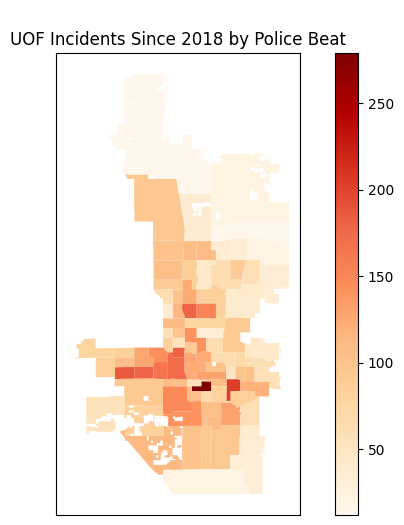

In [ ]:
beat_map.plot(column='UOF Incidents', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nUOF Incidents Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
beat_map.plot(column='Severe UOF Incidents', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nSevere UOF Incidents Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
beat_map.plot(column='Very Severe UOF Incidents', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nVery Severe UOF Incidents Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
beat_map.plot(column='Severe UOF Ratio', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("Proportion of Severe UOF Incidents to Total UOF by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('prop_beat.png')

In [ ]:
beat_map.plot(column='Very Severe UOF Ratio', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("Proportion of Very Severe UOF Incidents to Total UOF by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
beat_map.plot(column='UOF per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nUOF Incidents per 100k People Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('UOF_beat.png')

In [ ]:
precinct_map.plot(column='UOF per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nUOF Incidents per 100k People Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('UOF_precinct.png')

In [ ]:
beat_map.plot(column='Severe UOF per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nSevere UOF Incidents per 100k People Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('severe_100_beat.png')

In [ ]:
#precinct_map.plot(column='Severe UOF per 100k', cmap='OrRd', figsize=(9,6), legend=True)
#plt.title("\nSevere UOF Incidents per 100k People Since 2018 by Police Precinct", ha='center')
#plt.xticks([])
#plt.yticks([])
#plt.savefig('severe_100_precinct.png')

In [ ]:
precinct_beat_corr = precinct_beat_corr.merge(severe_uof_beat, left_on='BEAT', right_on='Police Beat', how='inner')
uof_precinct = precinct_beat_corr.groupby('PRECINCT')[['Severe UOF Incidents']].sum()

In [ ]:
uof_precinct

In [ ]:
precinct_beat_corr = precinct_beat_corr.merge(very_severe_uof_beat, left_on='BEAT', right_on='Police Beat', how='inner')
uof_precinct2 = precinct_beat_corr.groupby('PRECINCT')[['Very Severe UOF Incidents']].sum()

In [ ]:
uof_precinct2

In [ ]:
precinct_map = precinct_map.merge(uof_precinct, left_on='NAME', right_on='PRECINCT', how='inner')
precinct_map['Severe UOF per 100k'] = precinct_map['Severe UOF Incidents'] / precinct_map['Total Pop'] * 100000
precinct_map['Severe UOF Ratio'] = precinct_map['Severe UOF Incidents'] / precinct_map['UOF Incidents']

In [ ]:
precinct_map = precinct_map.merge(uof_precinct2, left_on='NAME', right_on='PRECINCT', how='inner')
precinct_map['Very Severe UOF per 100k'] = precinct_map['Very Severe UOF Incidents'] / precinct_map['Total Pop'] * 100000
precinct_map['Very Severe UOF Ratio'] = precinct_map['Very Severe UOF Incidents'] / precinct_map['UOF Incidents']

In [ ]:
precinct_map.plot(column='UOF Incidents', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nUOF Incidents Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_map.plot(column='Severe UOF Incidents', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nSevere UOF Incidents Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_map.plot(column='Very Severe UOF Incidents', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nVery Severe UOF Incidents Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_map.plot(column='Severe UOF Ratio', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nProportion of Severe UOF Incidents to Total UOF Incidents by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('prop_precinct.png')

In [ ]:
precinct_map.plot(column='Very Severe UOF Ratio', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nProportion of Very Severe UOF Incidents to Total UOF Incidents by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_map['UOF to Arrests'] = precinct_map['UOF per 100k'] / precinct_map['Arrests per 100k']
precinct_map['Severe UOF to Arrests'] = precinct_map['Severe UOF per 100k'] / precinct_map['Arrests per 100k']
precinct_map['Very Severe UOF to Arrests'] = precinct_map['Very Severe UOF per 100k'] / precinct_map['Arrests per 100k']

KeyError: 'Severe UOF per 100k'

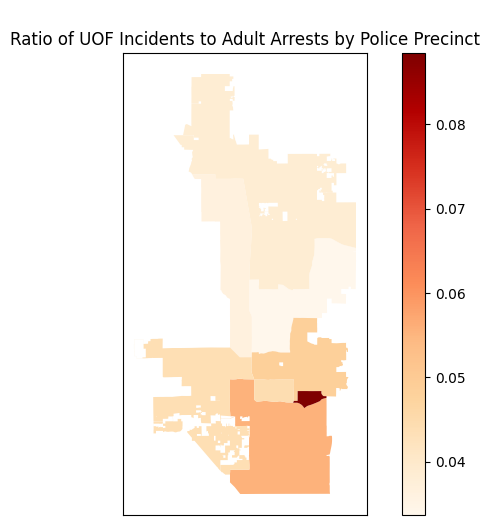

In [ ]:
precinct_map.plot(column='UOF to Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nRatio of UOF Incidents to Adult Arrests by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('ratio_precinct.png')

In [ ]:
precinct_map.plot(column='Severe UOF to Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nRatio of Severe UOF Incidents to Adult Arrests by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_map.plot(column='Very Severe UOF to Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nRatio of Very Severe UOF Incidents to Adult Arrests by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
beat_map['UOF to Arrests'] = beat_map['UOF per 100k'] / beat_map['Arrests per 100k']
beat_map['Severe UOF to Arrests'] = beat_map['Severe UOF per 100k'] / beat_map['Arrests per 100k']
beat_map['Very Severe UOF to Arrests'] = beat_map['Very Severe UOF per 100k'] / beat_map['Arrests per 100k']

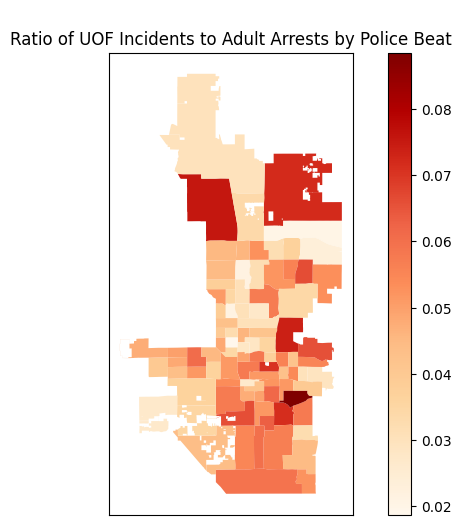

In [ ]:
beat_map.plot(column='UOF to Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nRatio of UOF Incidents to Adult Arrests by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('ratio_beat.png')

([], [])

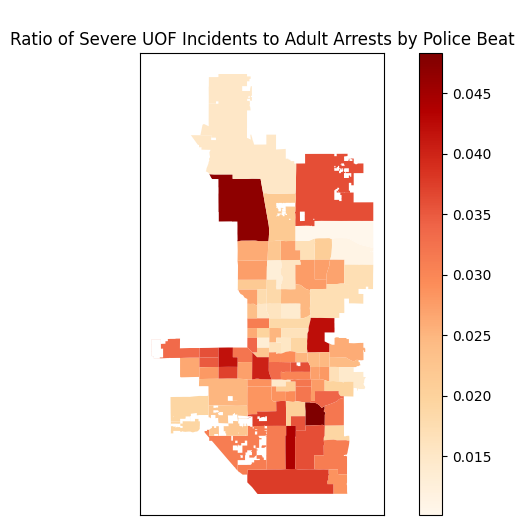

In [ ]:
beat_map.plot(column='Severe UOF to Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nRatio of Severe UOF Incidents to Adult Arrests by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

([], [])

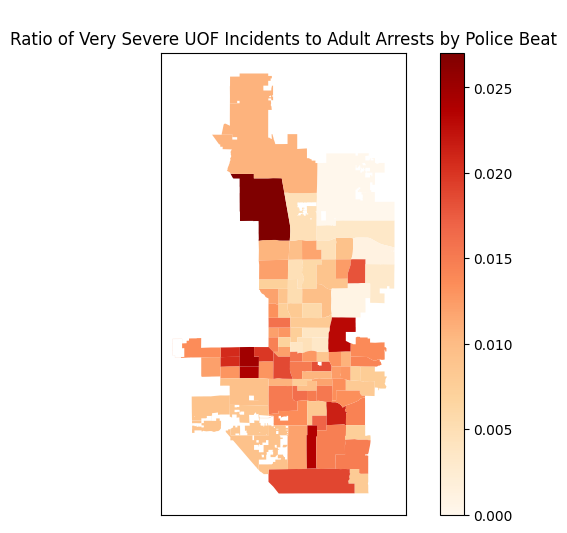

In [ ]:
beat_map.plot(column='Very Severe UOF to Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nRatio of Very Severe UOF Incidents to Adult Arrests by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
crime_df['Violent Crime Arrest'] = (crime_df.iloc[:,31] >= 1).astype(int)
crime_df['Felony Arrest'] = (crime_df.iloc[:,27] >= 1).astype(int)

In [ ]:
violent_arrests_beat = crime_df.groupby('BEAT_NUM')['Violent Crime Arrest'].sum().reset_index(name='Violent Crime Arrests')

In [ ]:
beat_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   OBJECTID                                       92 non-null     int64   
 1   BEAT                                           92 non-null     int64   
 2   geometry                                       92 non-null     geometry
 3   Number of Households                           92 non-null     int64   
 4   Number Households Below Poverty Level          92 non-null     int64   
 5   Poverty Rate                                   92 non-null     float64 
 6   Total Pop                                      92 non-null     int64   
 7   Black Pop                                      92 non-null     int64   
 8   Black Pop Rate                                 92 non-null     float64 
 9   Hispanic Pop                         

In [ ]:
beat_map = beat_map.merge(violent_arrests_beat, left_on='BEAT', right_on='BEAT_NUM', how='inner')
beat_map = beat_map.drop(beat_map.columns[[26]], axis=1)
beat_map['Violent Arrests per 100k'] = beat_map['Violent Crime Arrests'] / beat_map['Total Pop'] * 100000

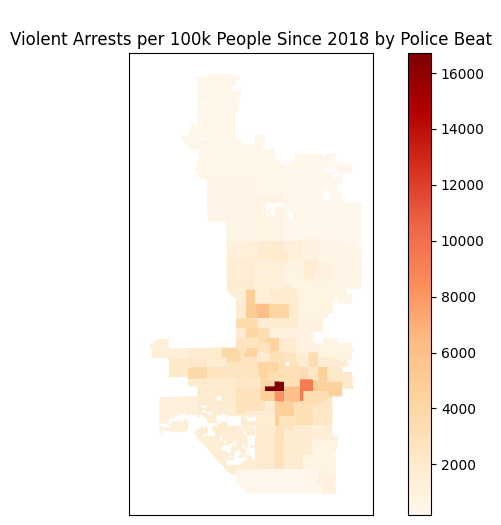

In [ ]:
beat_map.plot(column='Violent Arrests per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nViolent Arrests per 100k People Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('V_arrests_beat.png')

([], [])

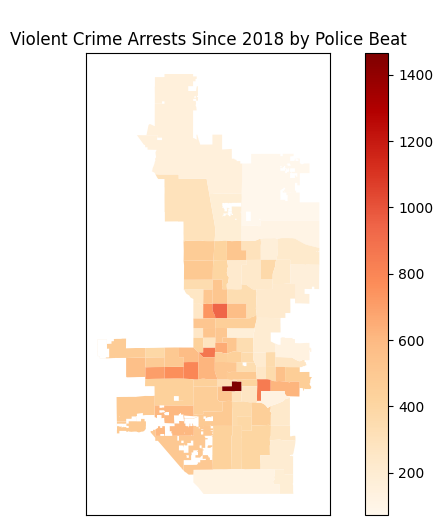

In [ ]:
beat_map.plot(column='Violent Crime Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nViolent Crime Arrests Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
beat_map['Violent Crime Ratio'] = beat_map['Violent Crime Arrests'] / beat_map['Adult Arrests']

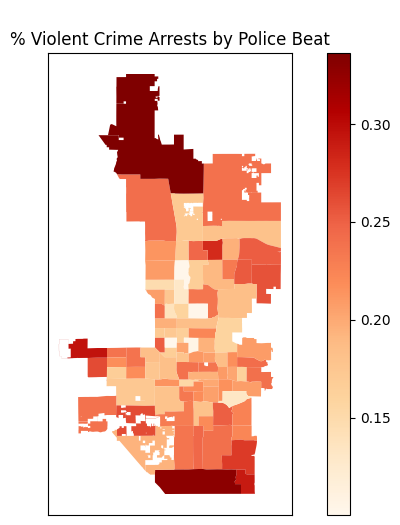

In [ ]:
beat_map.plot(column='Violent Crime Ratio', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\n% Violent Crime Arrests by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('V_percent_beat.png')

In [ ]:
precinct_beat_corr = precinct_beat_corr.merge(violent_arrests_beat, left_on='BEAT', right_on='BEAT_NUM', how='inner')
violent_arrests_precinct = precinct_beat_corr.groupby('PRECINCT')[['Violent Crime Arrests']].sum()

In [ ]:
precinct_map = precinct_map.merge(violent_arrests_precinct, left_on='NAME', right_on='PRECINCT', how='inner')
precinct_map['Violent Arrests per 100k'] = precinct_map['Violent Crime Arrests'] / precinct_map['Total Pop'] * 100000

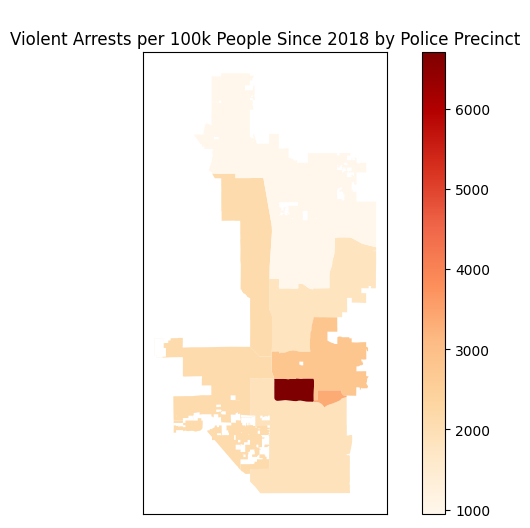

In [ ]:
precinct_map.plot(column='Violent Arrests per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nViolent Arrests per 100k People Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('V_arrests_precinct.png')

([], [])

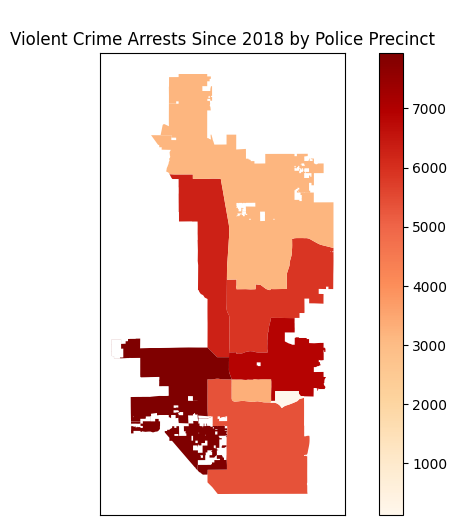

In [ ]:
precinct_map.plot(column='Violent Crime Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nViolent Crime Arrests Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_map['Violent Crime Ratio'] = precinct_map['Violent Crime Arrests'] / precinct_map['Adult Arrests']

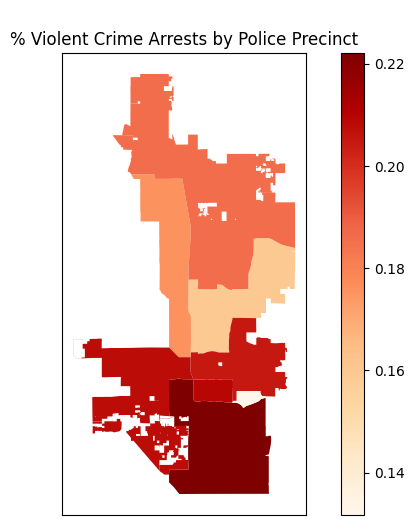

In [ ]:
precinct_map.plot(column='Violent Crime Ratio', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\n% Violent Crime Arrests by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('V_percent_precinct.png')

In [ ]:
felony_arrests_beat = crime_df.groupby('BEAT_NUM')['Felony Arrest'].sum().reset_index(name='Felony Crime Arrests')

In [ ]:
beat_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   OBJECTID                                       92 non-null     int64   
 1   BEAT                                           92 non-null     int64   
 2   geometry                                       92 non-null     geometry
 3   Number of Households                           92 non-null     int64   
 4   Number Households Below Poverty Level          92 non-null     int64   
 5   Poverty Rate                                   92 non-null     float64 
 6   Total Pop                                      92 non-null     int64   
 7   Black Pop                                      92 non-null     int64   
 8   Black Pop Rate                                 92 non-null     float64 
 9   Hispanic Pop                         

In [ ]:
beat_map = beat_map.merge(felony_arrests_beat, left_on='BEAT', right_on='BEAT_NUM', how='inner')
beat_map = beat_map.drop(beat_map.columns[[29]], axis=1)
beat_map['Felony Arrests per 100k'] = beat_map['Felony Crime Arrests'] / beat_map['Total Pop'] * 100000

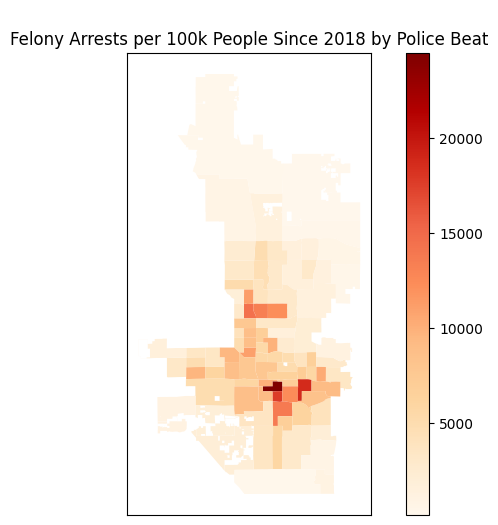

In [ ]:
beat_map.plot(column='Felony Arrests per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nFelony Arrests per 100k People Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('F_arrests_beat.png')

([], [])

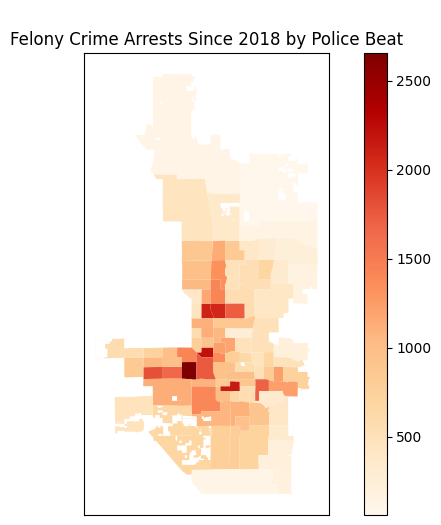

In [ ]:
beat_map.plot(column='Felony Crime Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nFelony Crime Arrests Since 2018 by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
beat_map['Felony Crime Ratio'] = beat_map['Felony Crime Arrests'] / beat_map['Adult Arrests']

([], [])

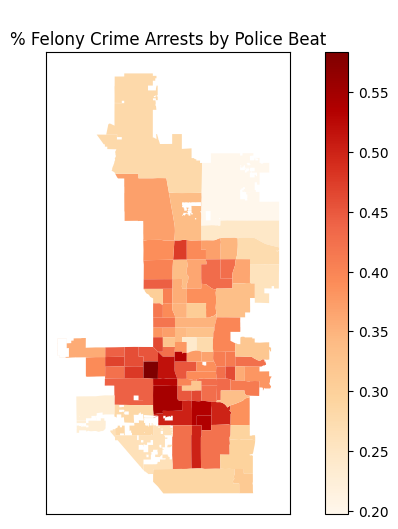

In [ ]:
beat_map.plot(column='Felony Crime Ratio', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\n% Felony Crime Arrests by Police Beat", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_beat_corr = precinct_beat_corr.merge(felony_arrests_beat, left_on='BEAT', right_on='BEAT_NUM', how='inner')
felony_arrests_precinct = precinct_beat_corr.groupby('PRECINCT')[['Felony Crime Arrests']].sum()

In [ ]:
precinct_map = precinct_map.merge(felony_arrests_precinct, left_on='NAME', right_on='PRECINCT', how='inner')
precinct_map['Felony Arrests per 100k'] = precinct_map['Felony Crime Arrests'] / precinct_map['Total Pop'] * 100000

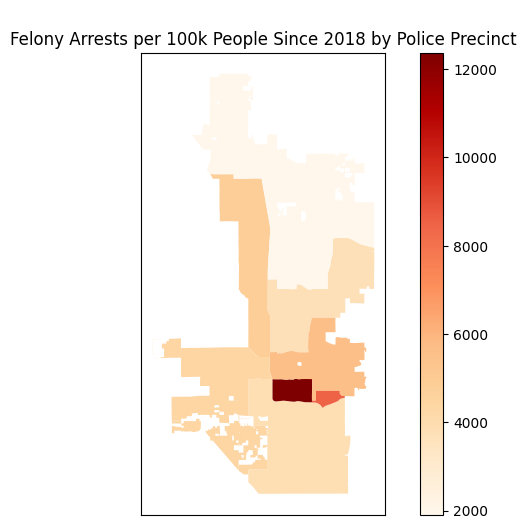

In [ ]:
precinct_map.plot(column='Felony Arrests per 100k', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nFelony Arrests per 100k People Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])
plt.savefig('F_arrests_precinct.png')

([], [])

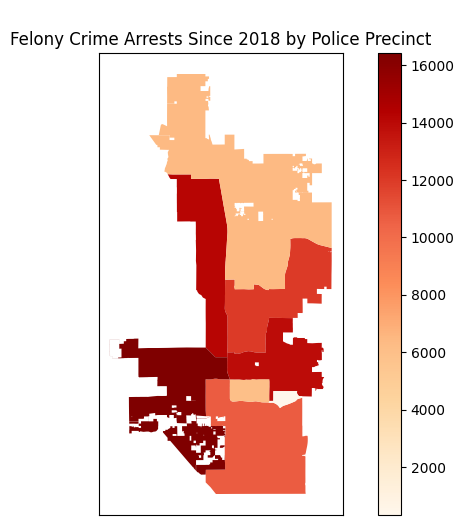

In [ ]:
precinct_map.plot(column='Felony Crime Arrests', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\nFelony Crime Arrests Since 2018 by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_map['Felony Crime Ratio'] = precinct_map['Felony Crime Arrests'] / precinct_map['Adult Arrests']

([], [])

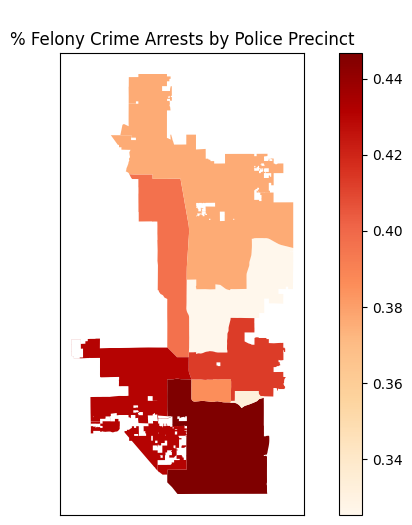

In [ ]:
precinct_map.plot(column='Felony Crime Ratio', cmap='OrRd', figsize=(9,6), legend=True)
plt.title("\n% Felony Crime Arrests by Police Precinct", ha='center')
plt.xticks([])
plt.yticks([])

In [ ]:
precinct_corr = precinct_map[precinct_map['NAME'] != 'Sky Harbor International Airport']
print(precinct_corr['Arrests per 100k'].corr(precinct_corr['Severe UOF per 100k']))
print(precinct_corr['Violent Arrests per 100k'].corr(precinct_corr['Severe UOF per 100k']))
print(precinct_corr['Felony Arrests per 100k'].corr(precinct_corr['Severe UOF per 100k']))
print(precinct_corr['Black Pop Rate'].corr(precinct_corr['Severe UOF per 100k']))
print(precinct_corr['Hispanic Pop Rate'].corr(precinct_corr['Severe UOF per 100k']))
print()
print()
print(precinct_corr['Arrests per 100k'].corr(precinct_corr['UOF per 100k']))
print(precinct_corr['Violent Arrests per 100k'].corr(precinct_corr['UOF per 100k']))
print(precinct_corr['Felony Arrests per 100k'].corr(precinct_corr['UOF per 100k']))
print(precinct_corr['Black Pop Rate'].corr(precinct_corr['UOF per 100k']))
print(precinct_corr['Hispanic Pop Rate'].corr(precinct_corr['UOF per 100k']))
print()
print()
print(precinct_corr['Severe UOF per 100k'].corr(precinct_corr['UOF per 100k']))

0.9698596982356615
0.9895410045098264
0.9909134196893081
0.589870051817951
0.5055035769893621


0.9804819532485901
0.9956678565628497
0.9923621396700892
0.5684532482298261
0.3997652892973608


0.9910671153954446


In [ ]:
beat_corr = precinct_beat_corr[precinct_beat_corr['PRECINCT'] != 'Sky Harbor International Airport']

beat_corr['Severe UOF per 100k'] = beat_corr['Severe UOF Incidents'] / beat_corr['Total Pop'] * 100000
beat_corr['Arrests per 100k'] = beat_corr['Adult Arrests'] / beat_corr['Total Pop'] * 100000
beat_corr['Felony Arrests per 100k'] = beat_corr['Felony Crime Arrests'] / beat_corr['Total Pop'] * 100000
beat_corr['Violent Arrests per 100k'] = beat_corr['Violent Crime Arrests'] / beat_corr['Total Pop'] * 100000

print(beat_corr['Arrests per 100k'].corr(beat_corr['Severe UOF per 100k']))
print(beat_corr['Violent Arrests per 100k'].corr(beat_corr['Severe UOF per 100k']))
print(beat_corr['Felony Arrests per 100k'].corr(beat_corr['Severe UOF per 100k']))
print(beat_corr['Black Pop Rate'].corr(beat_corr['Severe UOF per 100k']))
print(beat_corr['Hispanic Pop Rate'].corr(beat_corr['Severe UOF per 100k']))
print()
print()
print(beat_corr['Arrests per 100k'].corr(beat_corr['UOF per 100k']))
print(beat_corr['Violent Arrests per 100k'].corr(beat_corr['UOF per 100k']))
print(beat_corr['Felony Arrests per 100k'].corr(beat_corr['UOF per 100k']))
print(beat_corr['Black Pop Rate'].corr(beat_corr['UOF per 100k']))
print(beat_corr['Hispanic Pop Rate'].corr(beat_corr['UOF per 100k']))
print()
print()
print(beat_corr['Severe UOF per 100k'].corr(beat_corr['UOF per 100k']))

0.9325883695449879
0.9587351060041757
0.8916106269861744
0.3223703034106309
0.29851712385618623


0.9477332233179114
0.9772487213099125
0.9293999631200291
0.3154619654133707
0.2731570237892637


0.9784409467268912


<ipython-input-133-50c4a2ca7284>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beat_corr['Severe UOF per 100k'] = beat_corr['Severe UOF Incidents'] / beat_corr['Total Pop'] * 100000
<ipython-input-133-50c4a2ca7284>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beat_corr['Arrests per 100k'] = beat_corr['Adult Arrests'] / beat_corr['Total Pop'] * 100000
<ipython-input-133-50c4a2ca7284>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

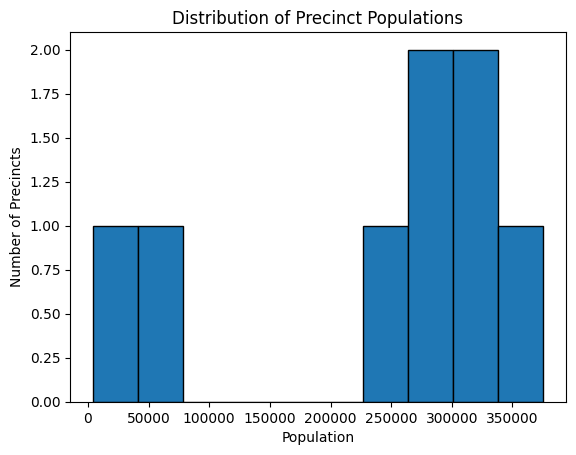

In [ ]:
import matplotlib.pyplot as plt

plt.hist(precinct_map['Total Pop'], bins=10, edgecolor='black')
plt.title('Distribution of Precinct Populations')
plt.xlabel('Population')
plt.ylabel('Number of Precincts')
plt.grid(False)
plt.savefig('precinct_pop.png')
plt.show()

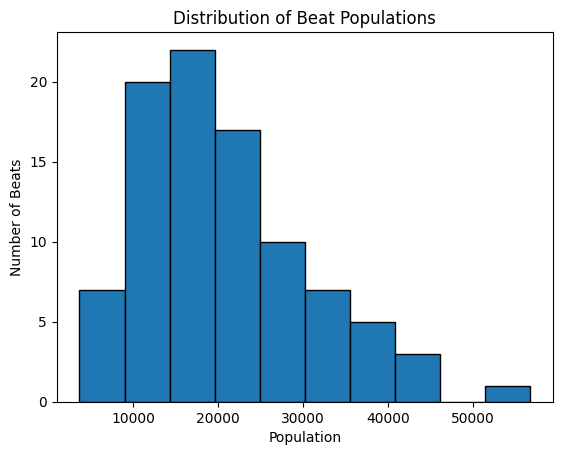

In [ ]:
plt.hist(beat_map['Total Pop'], bins=10, edgecolor='black')
plt.title('Distribution of Beat Populations')
plt.xlabel('Population')
plt.ylabel('Number of Beats')
plt.grid(False)
plt.savefig('beat_pop.png')
plt.show()

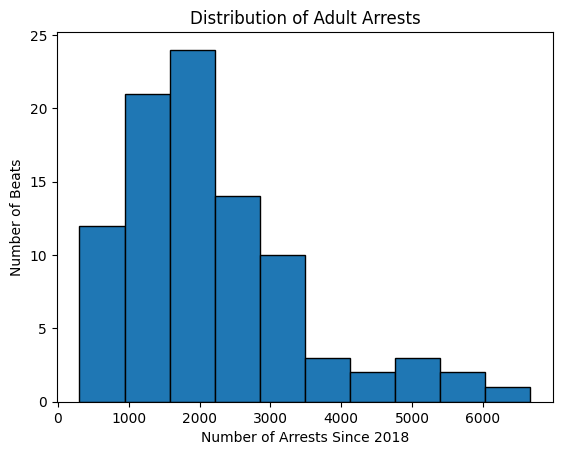

In [ ]:
plt.hist(beat_map['Adult Arrests'], bins=10, edgecolor='black')
plt.title('Distribution of Adult Arrests')
plt.xlabel('Number of Arrests Since 2018')
plt.ylabel('Number of Beats')
plt.grid(False)
plt.savefig('beat_arrests.png')
plt.show()

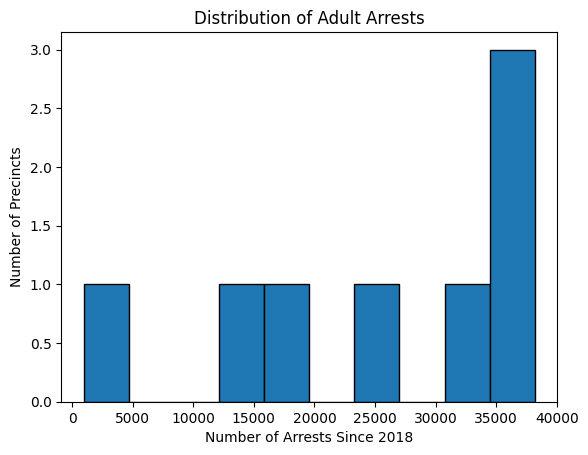

In [ ]:
plt.hist(precinct_map['Adult Arrests'], bins=10, edgecolor='black')
plt.title('Distribution of Adult Arrests')
plt.xlabel('Number of Arrests Since 2018')
plt.ylabel('Number of Precincts')
plt.grid(False)
plt.savefig('precinct_arrests.png')
plt.show()

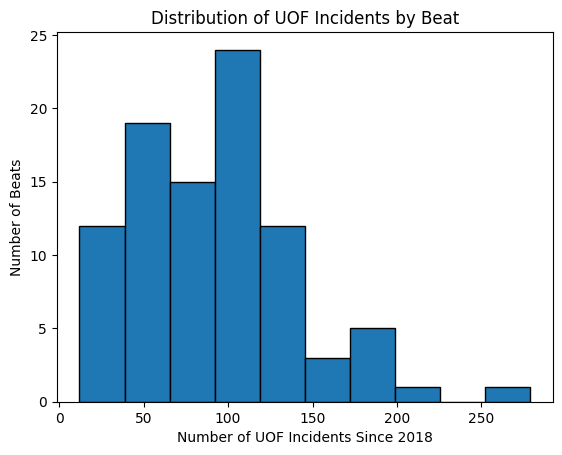

In [ ]:
plt.hist(beat_map['UOF Incidents'], bins=10, edgecolor='black')
plt.title('Distribution of UOF Incidents by Beat')
plt.xlabel('Number of UOF Incidents Since 2018')
plt.ylabel('Number of Beats')
plt.grid(False)
plt.show()

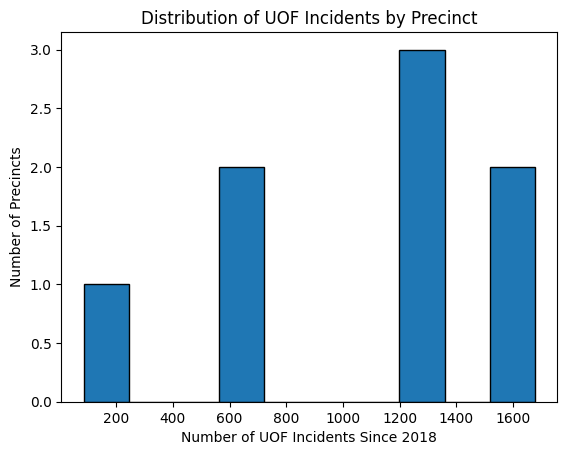

In [ ]:
plt.hist(precinct_map['UOF Incidents'], bins=10, edgecolor='black')
plt.title('Distribution of UOF Incidents by Precinct')
plt.xlabel('Number of UOF Incidents Since 2018')
plt.ylabel('Number of Precincts')
plt.grid(False)
plt.show()

In [ ]:
beat_map.to_file("beat_map.geojson", driver='GeoJSON')
precinct_map.to_file("precinct_map.geojson", driver='GeoJSON')

In [ ]:
precinct_beat_list = precinct_beat_corr.iloc[:,:2]

In [ ]:
precinct_beat_list.to_csv("precinct_beat_list.csv")